https://byeongkijeong.github.io/ARIMA-with-Python/

In [2]:
import pandas as pd

### 날짜별로 댓글수 세기

In [11]:
df1=pd.read_excel("twitter_data_2015-01-01_to_2015-12-30.xlsx")
df2=pd.read_excel("twitter_data_2016-01-01_to_2016-12-30.xlsx")
df3=pd.read_excel("twitter_data_2017-01-01_to_2017-12-30.xlsx")
df4=pd.read_excel("twitter_data_2018-01-01_to_2018-12-30.xlsx")
df5=pd.read_excel("twitter_data_2019-01-01_to_2019-06-29.xlsx")

In [7]:
a1=df1["날짜"].unique()
a2=df2["날짜"].unique()
a3=df3["날짜"].unique()
a4=df4["날짜"].unique()
a5=df5["날짜"].unique()

In [10]:
date_cnt1=[]
date_cnt2=[]
date_cnt3=[]
date_cnt4=[]
date_cnt5=[]

In [12]:
for i in range(0,len(a1)):
    date_cnt1.append(0)
    
for i in range(0,len(a2)):
    date_cnt2.append(0)
for i in range(0,len(a3)):
    date_cnt3.append(0)
    
for i in range(0,len(a4)):
    date_cnt4.append(0)
    
for i in range(0,len(a5)):
    date_cnt5.append(0)

In [15]:
for i in range(0,len(df1)):
    for j in range(0,len(a1)):
        if a1[j]==df1["날짜"][i]:
            date_cnt1[j]+=1

In [16]:
for i in range(0,len(df2)):
    for j in range(0,len(a2)):
        if a2[j]==df2["날짜"][i]:
            date_cnt2[j]+=1

In [17]:
for i in range(0,len(df3)):
    for j in range(0,len(a3)):
        if a3[j]==df3["날짜"][i]:
            date_cnt3[j]+=1

In [18]:
for i in range(0,len(df4)):
    for j in range(0,len(a4)):
        if a4[j]==df4["날짜"][i]:
            date_cnt4[j]+=1

In [19]:
for i in range(0,len(df5)):
    for j in range(0,len(a5)):
        if a5[j]==df5["날짜"][i]:
            date_cnt5[j]+=1

In [20]:
f1=pd.DataFrame({"날짜":a1,"댓글수":date_cnt1})
f2=pd.DataFrame({"날짜":a2,"댓글수":date_cnt2})
f3=pd.DataFrame({"날짜":a3,"댓글수":date_cnt3})
f4=pd.DataFrame({"날짜":a4,"댓글수":date_cnt4})
f5=pd.DataFrame({"날짜":a5,"댓글수":date_cnt5})

In [29]:
len(f1),len(f2),len(f3),len(f4),len(f5)

(127, 89, 32, 121, 74)

In [21]:
f=pd.concat([f1,f2,f3,f4,f5])

In [26]:
f=f.sort_values(["날짜"],ascending=[True])
len(f)

443

In [28]:
f.to_excel("date_cnt.xlsx")

## 시계열로 나타내기

In [8]:
df=pd.read_excel("date_cnt.xlsx", header=0, index_col=0, squeeze=True)

In [73]:
df.head()

,날짜,빈도
0,2019-07-01,1
1,2019-07-02,20
2,2019-07-03,42
3,2019-07-04,137
4,2019-07-05,289


In [74]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

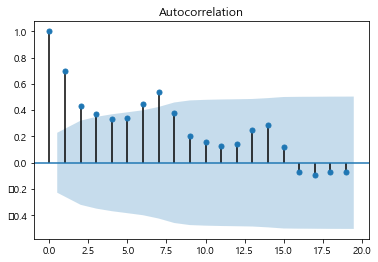

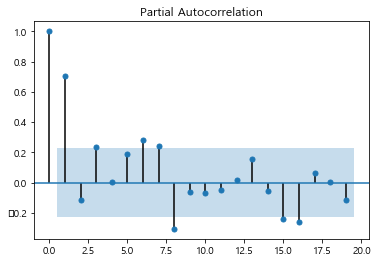

In [75]:
plot_acf(df)
plot_pacf(df)
plt.show()

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (300,100)

%matplotlib inline

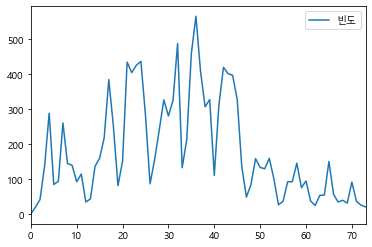

In [83]:
df.plot()
plt.show()

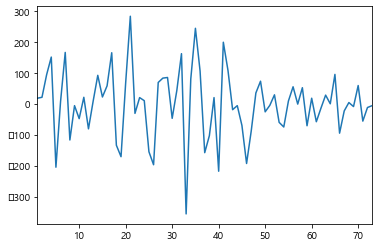

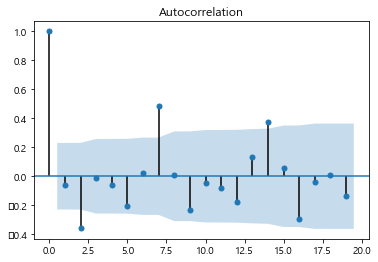

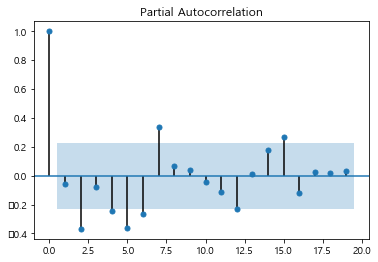

In [86]:
diff_1=df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [14]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(0,1,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.댓글수   No. Observations:                  442
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1327.406
Method:                       css-mle   S.D. of innovations              4.870
Date:                Sun, 15 Sep 2019   AIC                           2660.811
Time:                        10:52:59   BIC                           2673.085
Sample:                             1   HQIC                          2665.653
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0004      0.043     -0.010      0.992      -0.085       0.084
ma.L1.D.댓글수    -0.8161      0.058    -14.053      0.000      -0.930      -0.702
                                    Roots       

C:\Python\py\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Python\py\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


### constant가 유효하지 않다  따라서 trend='nc'

In [40]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.빈도   No. Observations:                   73
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -445.158
Method:                       css-mle   S.D. of innovations            107.635
Date:                Wed, 18 Sep 2019   AIC                            894.317
Time:                        18:24:21   BIC                            898.898
Sample:                             1   HQIC                           896.142
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.빈도    -0.2302      0.259     -0.890      0.377      -0.737       0.277
                                    Roots                                    
                  Real          Imaginary           M

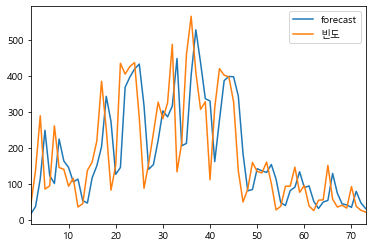

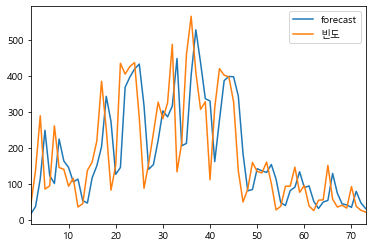

In [41]:
model_fit.plot_predict()

In [42]:
fore = model_fit.forecast(steps=1)
print(fore)
#위 코드의 결과 순서대로 예측값, stderr, upper bound, lower bound 이다.

(array([23.24235411]), array([107.63530768]), array([[-187.7189724 ,  234.20368063]]))


In [ ]:
import pandas as pd
df1=pd.read_excel("twitter_data_2019-07-01_to_2019-09-09.xlsx")
a1=df1["날짜"].unique()
date_cnt1=[]

for i in range(0,len(a1)):
    date_cnt1.append(0)

for i in range(0,len(df1)):
    for j in range(0,len(a1)):
        if a1[j]==df1["날짜"][i]:
            date_cnt1[j]+=1

            
f1=pd.DataFrame({"날짜":a1,"댓글수":date_cnt1})
f1=f1.sort_values(["날짜"],ascending=[True])

f=pd.read_excel("date_cnt.xlsx", header=0, index_col=0, squeeze=True)
df=pd.concat([f,f1])

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_acf(df)
plot_pacf(df)
plt.show()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc

# font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (300,100)

%matplotlib inline

df.plot()
plt.show()

diff_1=df.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df, order=(0,1,1))
model_fit = model.fit(trend='nc',full_output=True, disp=1)
print(model_fit.summary())

model_fit.plot_predict()

fore = model_fit.forecast(steps=1)
print(fore)
#위 코드의 결과 순서대로 예측값, stderr, upper bound, lower bound 이다.